   # The Data

In [5]:
#! pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-manylinux2010_x86_64.whl (458.4 MB)
  Using cached grpcio-1.39.0-cp38-cp38-manylinux2014_x86_64.whl (4.3 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached h5py-3.1.0-cp38-cp38-manylinux1_x86_64.whl (4.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached

In [192]:
# Imports 
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [193]:
df = pd.read_csv('../cryptocurrency_trading/data/final_data_from_2018_01_01_to_2021_08_31.csv')

In [194]:
df = df.drop(columns = 'Unnamed: 0')

In [195]:
df.head()

,start,tweet_count,sentimentscore,open,high,low,close,adjClose,volume,unadjustedVolume,...,changePercent,vwap,changeOverTime,UpperBB,LowerBB,volatility,rsi,macd,real_score,post_per_day
0,2018-01-01,90414,4.087525,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,1.029120e+10,1.029120e+10,...,-3.224,13641.36686,-0.03224,20532.876074,5012.581523,1290.493390,46.256417,95.011453,0.191187,464.0
1,2018-01-02,125905,4.721295,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,1.684660e+10,1.684660e+10,...,9.960,14530.09961,0.09960,20514.236225,5368.125747,1018.066882,51.765003,112.782434,0.476037,594.0
2,2018-01-03,134825,6.096648,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,1.687190e+10,1.687190e+10,...,1.487,15206.09994,0.01487,20488.303236,5736.668737,883.368621,52.628926,142.882437,0.689065,620.0
3,2018-01-04,126106,4.738479,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,2.178320e+10,2.178320e+10,...,2.151,15287.03353,0.02151,20492.881190,6063.437189,864.964200,54.234716,196.602028,-0.144155,629.0
4,2018-01-05,115883,5.809624,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,2.384090e+10,2.384090e+10,...,12.614,16779.16634,0.12614,20605.405339,6333.225442,1103.623175,60.810539,382.456370,0.197948,686.0


In [36]:
df = df.drop(columns = ['changeOverTime'])

In [37]:
df = df[:1295]

In [196]:
df = df.rename(columns={'sentimentscore': 'twitter_sentiment', 'real_score': 'reddit_sentiment','post_per_day':'reddit_post_count'})

In [197]:
df.head()

,start,tweet_count,twitter_sentiment,open,high,low,close,adjClose,volume,unadjustedVolume,...,changePercent,vwap,changeOverTime,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
0,2018-01-01,90414,4.087525,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,1.029120e+10,1.029120e+10,...,-3.224,13641.36686,-0.03224,20532.876074,5012.581523,1290.493390,46.256417,95.011453,0.191187,464.0
1,2018-01-02,125905,4.721295,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,1.684660e+10,1.684660e+10,...,9.960,14530.09961,0.09960,20514.236225,5368.125747,1018.066882,51.765003,112.782434,0.476037,594.0
2,2018-01-03,134825,6.096648,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,1.687190e+10,1.687190e+10,...,1.487,15206.09994,0.01487,20488.303236,5736.668737,883.368621,52.628926,142.882437,0.689065,620.0
3,2018-01-04,126106,4.738479,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,2.178320e+10,2.178320e+10,...,2.151,15287.03353,0.02151,20492.881190,6063.437189,864.964200,54.234716,196.602028,-0.144155,629.0
4,2018-01-05,115883,5.809624,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,2.384090e+10,2.384090e+10,...,12.614,16779.16634,0.12614,20605.405339,6333.225442,1103.623175,60.810539,382.456370,0.197948,686.0


In [198]:
df.tail()

,start,tweet_count,twitter_sentiment,open,high,low,close,adjClose,volume,unadjustedVolume,...,changePercent,vwap,changeOverTime,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
1295,2021-09-01,287533,1.320321,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,3.913940e+10,3.913940e+10,...,3.710,48173.51823,0.03710,54605.786219,29156.811203,980.043228,59.075752,1603.035676,NaN,NaN
1296,2021-09-02,343047,7.162905,48840.414063,49817.667969,48767.839844,49598.503906,49598.503906,3.908957e+10,3.908957e+10,...,1.552,49394.67057,0.01552,54850.728295,29582.915377,909.622739,61.075470,1617.659747,NaN,NaN
1297,2021-09-03,361200,3.201969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,2021-09-04,281577,1.085611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,2021-09-05,268859,1.414339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   start              1295 non-null   object 
 1   tweet_count        1295 non-null   int64  
 2   twitter_sentiment  1251 non-null   float64
 3   open               1295 non-null   float64
 4   high               1295 non-null   float64
 5   low                1295 non-null   float64
 6   close              1295 non-null   float64
 7   adjClose           1295 non-null   float64
 8   volume             1295 non-null   float64
 9   unadjustedVolume   1295 non-null   float64
 10  change             1295 non-null   float64
 11  changePercent      1295 non-null   float64
 12  vwap               1295 non-null   float64
 13  UpperBB            1295 non-null   float64
 14  LowerBB            1295 non-null   float64
 15  volatility         1295 non-null   float64
 16  rsi                1295 

In [42]:
df.shape

(1295, 20)

# Make our data stationary

### Price

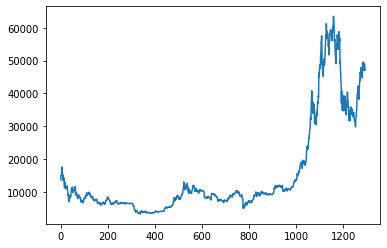

In [44]:
plt.plot(df['adjClose'])

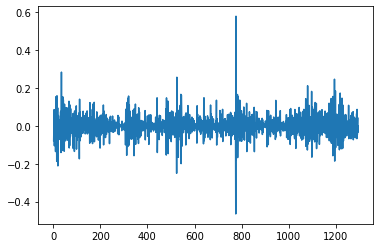

In [58]:
plt.plot(np.log(df['adjClose']).diff().diff())

In [199]:
df_stationary = df[['start']]

In [200]:
df_stationary['close_price'] = np.log(df['adjClose']).diff().diff()
df_stationary.head()

/tmp/ipykernel_15720/4027265948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stationary['close_price'] = np.log(df['adjClose']).diff().diff()


,start,close_price
0,2018-01-01,NaN
1,2018-01-02,NaN
2,2018-01-03,-0.078084
3,2018-01-04,0.011353
4,2018-01-05,0.085086


In [201]:
np.log(df['adjClose']).diff().isnull().sum()

4

### tweet count

In [202]:
df.head()

,start,tweet_count,twitter_sentiment,open,high,low,close,adjClose,volume,unadjustedVolume,...,changePercent,vwap,changeOverTime,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
0,2018-01-01,90414,4.087525,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,1.029120e+10,1.029120e+10,...,-3.224,13641.36686,-0.03224,20532.876074,5012.581523,1290.493390,46.256417,95.011453,0.191187,464.0
1,2018-01-02,125905,4.721295,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,1.684660e+10,1.684660e+10,...,9.960,14530.09961,0.09960,20514.236225,5368.125747,1018.066882,51.765003,112.782434,0.476037,594.0
2,2018-01-03,134825,6.096648,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,1.687190e+10,1.687190e+10,...,1.487,15206.09994,0.01487,20488.303236,5736.668737,883.368621,52.628926,142.882437,0.689065,620.0
3,2018-01-04,126106,4.738479,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,2.178320e+10,2.178320e+10,...,2.151,15287.03353,0.02151,20492.881190,6063.437189,864.964200,54.234716,196.602028,-0.144155,629.0
4,2018-01-05,115883,5.809624,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,2.384090e+10,2.384090e+10,...,12.614,16779.16634,0.12614,20605.405339,6333.225442,1103.623175,60.810539,382.456370,0.197948,686.0


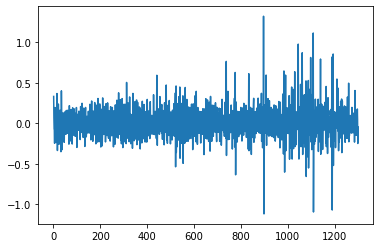

In [203]:
plt.plot(np.log(df['tweet_count']).diff())

In [204]:
df_stationary['tweet_count'] = np.log(df['tweet_count']).diff()
df_stationary.head()

/tmp/ipykernel_15720/3737448042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stationary['tweet_count'] = np.log(df['tweet_count']).diff()


,start,close_price,tweet_count
0,2018-01-01,NaN,NaN
1,2018-01-02,NaN,0.331129
2,2018-01-03,-0.078084,0.068450
3,2018-01-04,0.011353,-0.066855
4,2018-01-05,0.085086,-0.084542


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

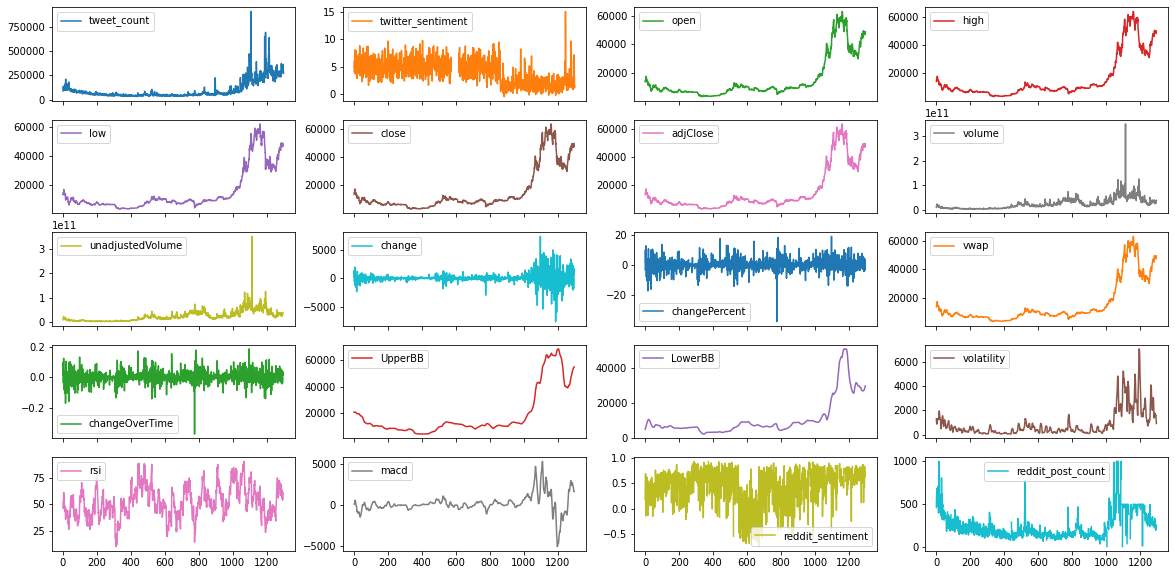

In [205]:
df.plot(subplots=True, layout=(5,4), figsize = (20,10))


In [206]:
df.head(1)

,start,tweet_count,twitter_sentiment,open,high,low,close,adjClose,volume,unadjustedVolume,...,changePercent,vwap,changeOverTime,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
0,2018-01-01,90414,4.087525,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,1.029120e+10,1.029120e+10,...,-3.224,13641.36686,-0.03224,20532.876074,5012.581523,1290.49339,46.256417,95.011453,0.191187,464.0


In [207]:
df_selected = df[['tweet_count', 'twitter_sentiment', 'adjClose', 'volume', 'volatility', 'rsi', 'macd', 'reddit_sentiment', 'reddit_post_count']]

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

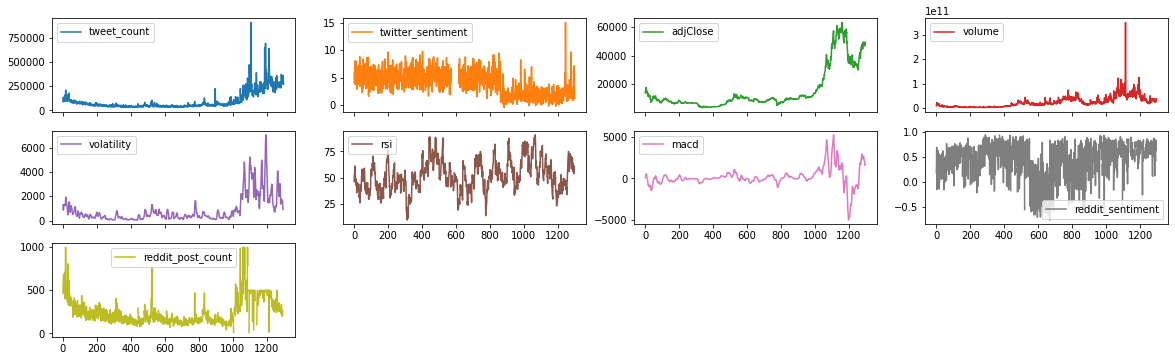

In [208]:
df_selected.plot(subplots=True, layout=(5,4), figsize = (20,10))

In [209]:
df_stationary['twitter_sentiment'] = df_selected['twitter_sentiment']

/tmp/ipykernel_15720/2072903302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stationary['twitter_sentiment'] = df_selected['twitter_sentiment']


In [322]:
df_stationary['adjClose'] = df_selected['adjClose'].pct_change()

### volume

In [210]:
df_selected.head()

,tweet_count,twitter_sentiment,adjClose,volume,volatility,rsi,macd,reddit_sentiment,reddit_post_count
0,90414,4.087525,13657.200195,1.029120e+10,1290.493390,46.256417,95.011453,0.191187,464.0
1,125905,4.721295,14982.099609,1.684660e+10,1018.066882,51.765003,112.782434,0.476037,594.0
2,134825,6.096648,15201.000000,1.687190e+10,883.368621,52.628926,142.882437,0.689065,620.0
3,126106,4.738479,15599.200195,2.178320e+10,864.964200,54.234716,196.602028,-0.144155,629.0
4,115883,5.809624,17429.500000,2.384090e+10,1103.623175,60.810539,382.456370,0.197948,686.0


/tmp/ipykernel_15720/2327093102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stationary['volume'] = df_selected['volume'].diff()


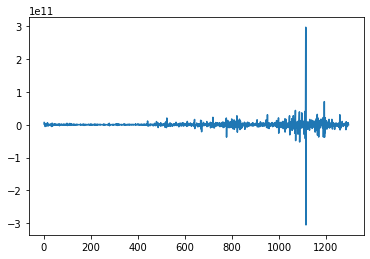

In [211]:
df_stationary['volume'] = df_selected['volume'].diff()
plt.plot(df_selected['volume'].diff())

In [212]:
df_stationary.head()

,start,close_price,tweet_count,twitter_sentiment,volume
0,2018-01-01,NaN,NaN,4.087525,NaN
1,2018-01-02,NaN,0.331129,4.721295,6.555400e+09
2,2018-01-03,-0.078084,0.068450,6.096648,2.529997e+07
3,2018-01-04,0.011353,-0.066855,4.738479,4.911300e+09
4,2018-01-05,0.085086,-0.084542,5.809624,2.057699e+09


### volatility

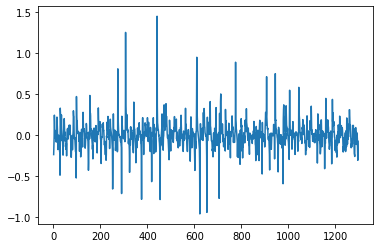

In [213]:
plt.plot(np.log(df_selected['volatility']).diff())

In [214]:
df_stationary['volatility'] = np.log(df_selected['volatility']).diff()

/tmp/ipykernel_15720/2432207052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stationary['volatility'] = np.log(df_selected['volatility']).diff()


In [215]:
df_stationary.head()

,start,close_price,tweet_count,twitter_sentiment,volume,volatility
0,2018-01-01,NaN,NaN,4.087525,NaN,NaN
1,2018-01-02,NaN,0.331129,4.721295,6.555400e+09,-0.237119
2,2018-01-03,-0.078084,0.068450,6.096648,2.529997e+07,-0.141918
3,2018-01-04,0.011353,-0.066855,4.738479,4.911300e+09,-0.021054
4,2018-01-05,0.085086,-0.084542,5.809624,2.057699e+09,0.243666


### Rsi

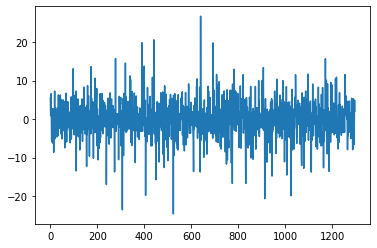

In [216]:
plt.plot(df_selected['rsi'].diff())

In [217]:
df_stationary['rsi'] = np.log(df_selected['rsi']).diff()

/tmp/ipykernel_15720/2845622810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stationary['rsi'] = np.log(df_selected['rsi']).diff()


In [218]:
df_stationary.head()

,start,close_price,tweet_count,twitter_sentiment,volume,volatility,rsi
0,2018-01-01,NaN,NaN,4.087525,NaN,NaN,NaN
1,2018-01-02,NaN,0.331129,4.721295,6.555400e+09,-0.237119,0.112514
2,2018-01-03,-0.078084,0.068450,6.096648,2.529997e+07,-0.141918,0.016552
3,2018-01-04,0.011353,-0.066855,4.738479,4.911300e+09,-0.021054,0.030055
4,2018-01-05,0.085086,-0.084542,5.809624,2.057699e+09,0.243666,0.114442


### macd

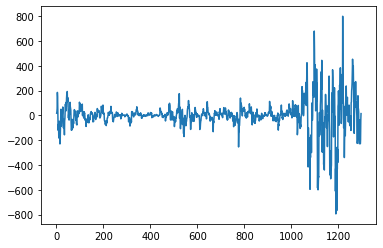

In [219]:
plt.plot(df_selected['macd'].diff())

In [220]:
df_stationary['macd'] =  df_selected['macd'].diff()

/tmp/ipykernel_15720/205995390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stationary['macd'] =  df_selected['macd'].diff()


### reddit sentiment

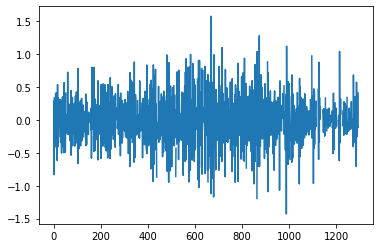

In [221]:
plt.plot(df_selected['reddit_sentiment'].diff())

In [222]:
df_stationary['reddit_sentiment'] =  df_selected['reddit_sentiment'].diff()

/tmp/ipykernel_15720/2229759874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stationary['reddit_sentiment'] =  df_selected['reddit_sentiment'].diff()


### reddit post count

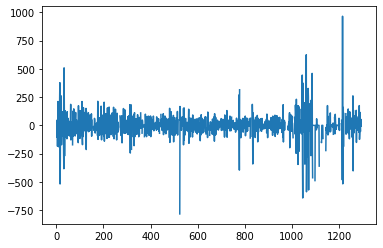

In [223]:
plt.plot(df_selected['reddit_post_count'].diff().diff())

In [224]:
df_stationary['reddit_post_count'] =  df_selected['reddit_post_count'].diff().diff()

/tmp/ipykernel_15720/3394837113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stationary['reddit_post_count'] =  df_selected['reddit_post_count'].diff().diff()


array([[<AxesSubplot:xlabel='start'>, <AxesSubplot:xlabel='start'>,
        <AxesSubplot:xlabel='start'>, <AxesSubplot:xlabel='start'>],
       [<AxesSubplot:xlabel='start'>, <AxesSubplot:xlabel='start'>,
        <AxesSubplot:xlabel='start'>, <AxesSubplot:xlabel='start'>],
       [<AxesSubplot:xlabel='start'>, <AxesSubplot:xlabel='start'>,
        <AxesSubplot:xlabel='start'>, <AxesSubplot:xlabel='start'>],
       [<AxesSubplot:xlabel='start'>, <AxesSubplot:xlabel='start'>,
        <AxesSubplot:xlabel='start'>, <AxesSubplot:xlabel='start'>],
       [<AxesSubplot:xlabel='start'>, <AxesSubplot:xlabel='start'>,
        <AxesSubplot:xlabel='start'>, <AxesSubplot:xlabel='start'>]],
      dtype=object)

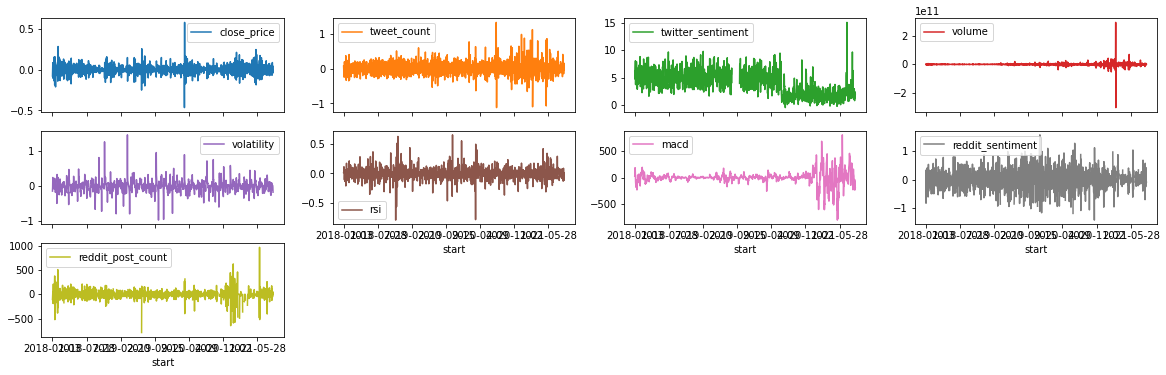

In [341]:
#df_stationary.drop('adjClose', axis = 1, inplace = True)
df_stationary.plot(subplots=True, layout=(5,4), figsize = (20,10))

In [342]:
df_stationary.to_csv('stationary_data.csv')

### drop na

In [225]:
df_stationary.head()

,start,close_price,tweet_count,twitter_sentiment,volume,volatility,rsi,macd,reddit_sentiment,reddit_post_count
0,2018-01-01,NaN,NaN,4.087525,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,NaN,0.331129,4.721295,6.555400e+09,-0.237119,0.112514,17.770981,0.284850,NaN
2,2018-01-03,-0.078084,0.068450,6.096648,2.529997e+07,-0.141918,0.016552,30.100003,0.213028,-104.0
3,2018-01-04,0.011353,-0.066855,4.738479,4.911300e+09,-0.021054,0.030055,53.719591,-0.833220,-17.0
4,2018-01-05,0.085086,-0.084542,5.809624,2.057699e+09,0.243666,0.114442,185.854342,0.342103,48.0


In [227]:
#df_stationary.dropna(inplace = True)
df_stationary = df_stationary[2:].copy()

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

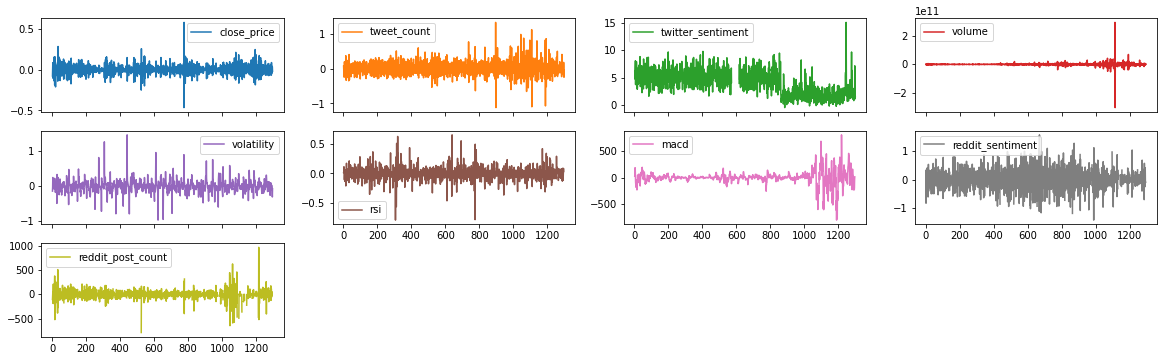

In [228]:
df_stationary.plot(subplots=True, layout=(5,4), figsize = (20,10))

In [238]:
#df_stationary.set_index('start', inplace = True)

df_stationary = df_stationary[:-5].copy()

In [239]:
df = df_stationary.copy()

# The Model


## data exploration

In [184]:
#df = df.set_index('start')

In [115]:
df.head()

,tweet_count,twitter_sentiment,adjClose,volume,changePercent,vwap,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
start,,,,,,,,,,,,,
2018-01-01,90414,4.087525,13657.200195,1.029120e+10,-3.224,13641.36686,20532.876074,5012.581523,1290.493390,46.256417,95.011453,0.191187,464.0
2018-01-02,125905,4.721295,14982.099609,1.684660e+10,9.960,14530.09961,20514.236225,5368.125747,1018.066882,51.765003,112.782434,0.476037,594.0
2018-01-03,134825,6.096648,15201.000000,1.687190e+10,1.487,15206.09994,20488.303236,5736.668737,883.368621,52.628926,142.882437,0.689065,620.0
2018-01-04,126106,4.738479,15599.200195,2.178320e+10,2.151,15287.03353,20492.881190,6063.437189,864.964200,54.234716,196.602028,-0.144155,629.0
2018-01-05,115883,5.809624,17429.500000,2.384090e+10,12.614,16779.16634,20605.405339,6333.225442,1103.623175,60.810539,382.456370,0.197948,686.0


In [143]:
df.describe()

,tweet_count,twitter_sentiment,adjClose,volume,changePercent,vwap,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
count,1295.000000,1251.000000,1295.000000,1.295000e+03,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1201.000000,1201.000000
mean,95216.486486,4.004496,15172.254281,2.463181e+10,0.183723,15140.318650,18206.198166,11039.826584,862.930606,52.252337,154.744315,0.434781,251.019151
std,87497.562638,2.159734,14716.895342,2.171723e+10,4.000777,14668.899023,17512.931521,10675.075977,1087.547778,14.335364,1110.764108,0.351883,149.406265
min,29265.000000,-0.524593,3236.761719,2.923670e+09,-37.187000,3234.481040,3994.801134,2277.308319,37.475515,9.920239,-5053.254798,-0.750258,11.000000
25%,45644.000000,2.242963,6843.328857,7.258674e+09,-1.522000,6833.774010,8348.078310,5696.173578,217.072081,42.561986,-225.581168,0.252901,149.000000
50%,58581.000000,4.060017,9190.854492,1.970970e+10,0.132000,9169.193030,10680.118170,6992.782247,422.904464,51.300568,7.688936,0.522565,199.000000
75%,94609.000000,5.532219,12346.645019,3.461106e+10,1.864500,12213.081055,17161.398239,9674.992451,922.110833,61.620811,369.572592,0.698950,304.000000
max,905884.000000,15.148350,63503.457031,3.509679e+11,18.797000,63114.882810,68529.194252,50666.918581,7090.539451,90.719554,5289.956609,0.936437,1000.000000


In [148]:
df.head()

,tweet_count,twitter_sentiment,adjClose,volume,changePercent,vwap,UpperBB,LowerBB,volatility,rsi,macd,reddit_sentiment,reddit_post_count
start,,,,,,,,,,,,,
2018-01-01,90414,4.087525,13657.200195,1.029120e+10,-3.224,13641.36686,20532.876074,5012.581523,1290.493390,46.256417,95.011453,0.191187,464.0
2018-01-02,125905,4.721295,14982.099609,1.684660e+10,9.960,14530.09961,20514.236225,5368.125747,1018.066882,51.765003,112.782434,0.476037,594.0
2018-01-03,134825,6.096648,15201.000000,1.687190e+10,1.487,15206.09994,20488.303236,5736.668737,883.368621,52.628926,142.882437,0.689065,620.0
2018-01-04,126106,4.738479,15599.200195,2.178320e+10,2.151,15287.03353,20492.881190,6063.437189,864.964200,54.234716,196.602028,-0.144155,629.0
2018-01-05,115883,5.809624,17429.500000,2.384090e+10,12.614,16779.16634,20605.405339,6333.225442,1103.623175,60.810539,382.456370,0.197948,686.0


In [240]:
df.tail()

,close_price,tweet_count,twitter_sentiment,volume,volatility,rsi,macd,reddit_sentiment,reddit_post_count
start,,,,,,,,,
2021-08-27,0.086202,0.061801,0.755258,1.844527e+09,0.032238,0.089123,-35.857295,-0.253182,-24.0
2021-08-28,-0.047290,-0.147833,2.404883,-5.942974e+09,0.017400,-0.009429,-65.689850,-0.055244,-54.0
2021-08-29,0.001705,0.156716,1.261597,-2.678453e+09,0.007779,-0.004682,-81.637783,0.418726,30.0
2021-08-30,-0.035540,-0.052436,1.388991,5.957357e+09,-0.038749,-0.116036,-228.996461,-0.113541,53.0
2021-08-31,0.039396,-0.030140,1.899930,2.883356e+09,-0.172390,0.006297,-191.344691,-0.093636,-6.0


In [255]:
df.columns = ['adjClose', 'tweet_count', 'twitter_sentiment', 'volume',
       'volatility', 'rsi', 'macd', 'reddit_sentiment', 'reddit_post_count']

In [256]:
from sklearn.impute import KNNImputer

In [257]:
imputer = KNNImputer(n_neighbors=2)
df['reddit_sentiment'],df['reddit_post_count'],df['twitter_sentiment'] = imputer.fit_transform(df[['reddit_sentiment','reddit_post_count','twitter_sentiment']]).T

In [258]:
df.isnull().sum()

adjClose             0
tweet_count          0
twitter_sentiment    0
volume               0
volatility           0
rsi                  0
macd                 0
reddit_sentiment     0
reddit_post_count    0
dtype: int64

In [259]:
df.isnull().values.sum(axis = 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

## train test split

In [260]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [261]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [262]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [316]:
train_df

,adjClose,tweet_count,twitter_sentiment,volume,volatility,rsi,macd,reddit_sentiment,reddit_post_count
start,,,,,,,,,
2018-01-03,-1.282915,0.409370,0.708600,0.005212,-0.820883,0.145075,0.659219,0.563656,-1.244836
2018-01-04,0.187977,-0.388832,-0.074973,1.203402,-0.113681,0.266023,1.176309,-2.187755,-0.190403
2018-01-05,1.400588,-0.493172,0.543006,0.503616,1.435256,1.021837,4.069058,0.903096,0.597392
2018-01-06,-1.731595,-1.449731,1.024172,-1.356202,0.966801,0.043896,3.262921,-0.168516,-2.226549
2018-01-07,-1.105872,0.542666,1.859351,-0.601460,0.049367,-0.814077,0.591200,0.489839,0.657991
...,...,...,...,...,...,...,...,...,...
2020-07-22,-0.110625,0.364181,-1.762147,-0.377990,1.154331,0.830402,0.558168,-1.168413,0.064115
2020-07-23,-0.164714,0.391031,-2.600100,0.394843,1.638994,0.257786,0.533461,-0.153201,-0.178283
2020-07-24,-0.170655,-0.221532,-2.638534,-0.391797,0.721922,-0.357159,0.333580,0.887597,0.379233


## window generator

In [323]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                train_df=train_df, val_df=val_df, test_df=test_df,
                label_columns=None):
    # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
          self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)
    return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
          """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

In [325]:
w1 = WindowGenerator(input_width=48, label_width=1, shift=1,
                     label_columns=['adjClose'])
w1

Total window size: 49
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48]
Label column name(s): ['adjClose']

In [326]:
w2 = WindowGenerator(input_width=24, label_width=1, shift=1,
                     label_columns=['adjClose'])
w2

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['adjClose']

In [327]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [328]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 25, 9)
Inputs shape: (3, 24, 9)
Labels shape: (3, 1, 1)


In [268]:
w2.example = example_inputs, example_labels

In [269]:
def plot(self, model=None, plot_col='adjClose', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

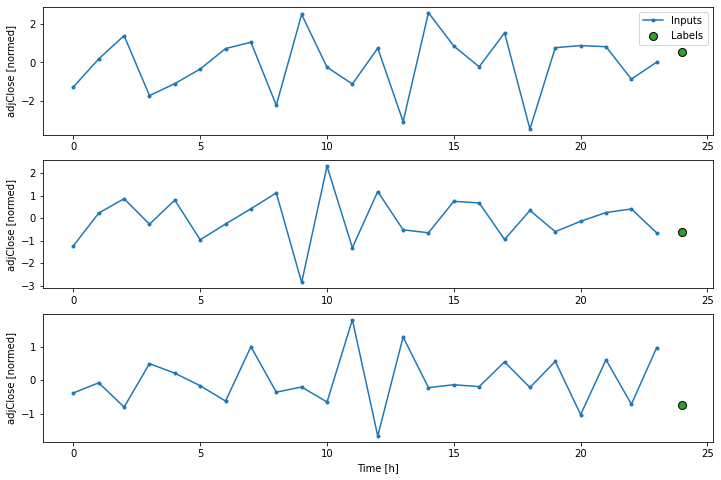

In [270]:
w2.plot()

In [271]:
# def make_dataset(self, data):
#   data = np.array(data, dtype=np.float32)
#   ds = tf.keras.preprocessing.timeseries_dataset_from_array(
#       data=data,
#       targets=None,
#       sequence_length=self.total_window_size,
#       sequence_stride=1,
#       shuffle=True,
#       batch_size=32,)

#   ds = ds.map(self.split_window)

#   return ds

WindowGenerator.make_dataset = make_dataset

In [272]:
# @property
# def train(self):
#   return self.make_dataset(self.train_df)

# @property
# def val(self):
#   return self.make_dataset(self.val_df)

# @property
# def test(self):
#   return self.make_dataset(self.test_df)

# @property
# def example(self):
#   """Get and cache an example batch of `inputs, labels` for plotting."""
#   result = getattr(self, '_example', None)
#   if result is None:
#     # No example batch was found, so get one from the `.train` dataset
#     result = next(iter(self.train))
#     # And cache it for next time
#     self._example = result
#   return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [273]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 24, 9), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [274]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 9)
Labels shape (batch, time, features): (32, 1, 1)


2021-09-07 15:47:10.524521: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [275]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['adjClose'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['adjClose']

In [276]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 9)
Labels shape (batch, time, features): (32, 1, 1)


In [277]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [278]:
baseline = Baseline(label_index=column_indices['adjClose'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

9/9 [==============================] - 0s 3ms/step - loss: 2.2472 - mean_absolute_error: 1.1544


In [279]:
wide_window = WindowGenerator(
    input_width=24, label_width=1, shift=1,
    label_columns=['adjClose'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['adjClose']

In [280]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 24, 1)


ValueError: x and y must be the same size

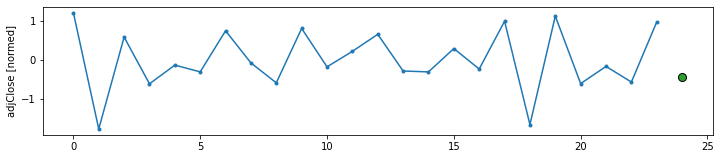

In [281]:
wide_window.plot(baseline)

In [285]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [286]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 9)
Output shape: (32, 1, 1)


In [287]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [288]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
29/29 [==============================] - 2s 26ms/step - loss: 3.2339 - mean_absolute_error: 1.2542 - val_loss: 33.9241 - val_mean_absolute_error: 2.9671
Epoch 2/20
29/29 [==============================] - 1s 15ms/step - loss: 3.0109 - mean_absolute_error: 1.2076 - val_loss: 31.4577 - val_mean_absolute_error: 2.8563
Epoch 3/20
29/29 [==============================] - 0s 13ms/step - loss: 2.8089 - mean_absolute_error: 1.1649 - val_loss: 29.3096 - val_mean_absolute_error: 2.7572
Epoch 4/20
29/29 [==============================] - 0s 13ms/step - loss: 2.6298 - mean_absolute_error: 1.1251 - val_loss: 27.2832 - val_mean_absolute_error: 2.6596
Epoch 5/20
29/29 [==============================] - 0s 12ms/step - loss: 2.4608 - mean_absolute_error: 1.0874 - val_loss: 25.4834 - val_mean_absolute_error: 2.5686
Epoch 6/20
29/29 [==============================] - 0s 12ms/step - loss: 2.3118 - mean_absolute_error: 1.0517 - val_loss: 23.6249 - val_mean_absolute_error: 2.4710
Epoch 7/20
29/29

In [289]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 24, 1)


ValueError: x and y must be the same size

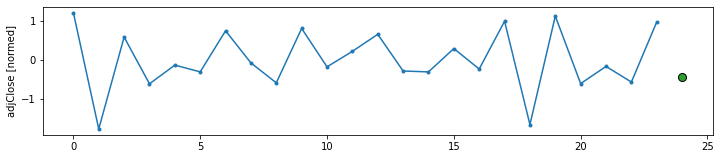

In [290]:
wide_window.plot(linear)

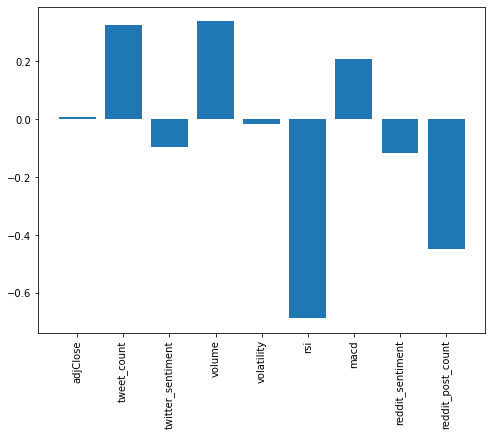

In [291]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [292]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
29/29 [==============================] - 2s 23ms/step - loss: 0.6982 - mean_absolute_error: 0.5585 - val_loss: 1.2469 - val_mean_absolute_error: 0.7714
Epoch 2/20
29/29 [==============================] - 0s 13ms/step - loss: 0.5554 - mean_absolute_error: 0.4880 - val_loss: 0.8261 - val_mean_absolute_error: 0.6469
Epoch 3/20
29/29 [==============================] - 0s 13ms/step - loss: 0.5320 - mean_absolute_error: 0.4793 - val_loss: 1.0966 - val_mean_absolute_error: 0.7306
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 0.9066 - mean_absolute_error: 0.6767


In [293]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['adjClose'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['adjClose']

Text(0.5, 1.0, 'Given 3 days of inputs, predict 1 day into the future.')

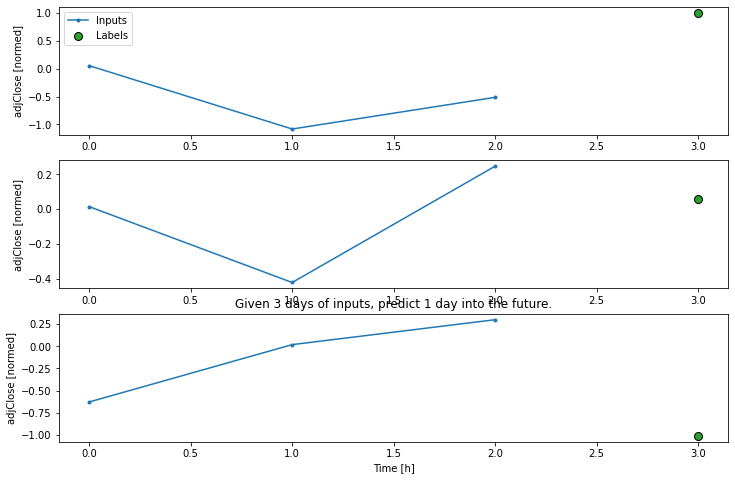

In [294]:
conv_window.plot()
plt.title("Given 3 days of inputs, predict 1 day into the future.")

In [295]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [296]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 9)
Output shape: (32, 1, 1)


In [297]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

8/8 [==============================] - 0s 6ms/step - loss: 1.2893 - mean_absolute_error: 0.7492


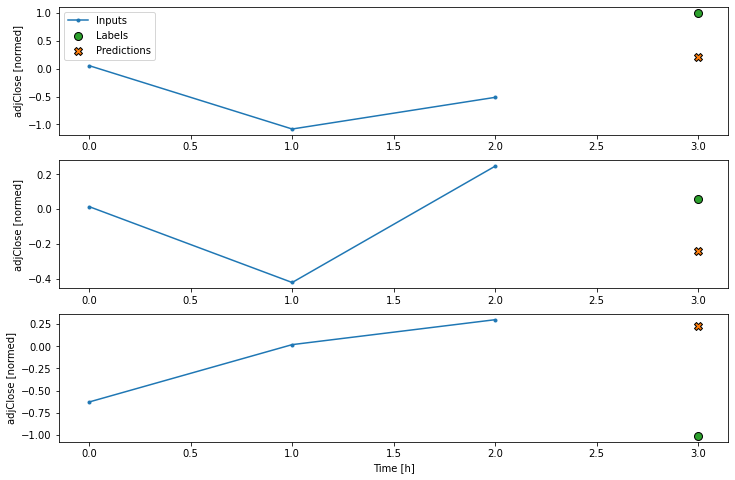

In [298]:
conv_window.plot(multi_step_dense)

In [299]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 9)

ValueError:Input 0 of layer dense_7 is incompatible with the layer: expected axis -1 of input shape to have value 27 but received input with shape (32, 216)


In [300]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [301]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 9)
Output shape: (32, 1, 1)


In [302]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

8/8 [==============================] - 0s 6ms/step - loss: 1.3598 - mean_absolute_error: 0.7198


In [303]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 9)
Labels shape: (32, 1, 1)
Output shape: (32, 22, 1)


In [304]:
LABEL_WIDTH = 1
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['adjClose'])

wide_conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['adjClose']

In [305]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 3, 9)
Labels shape: (32, 1, 1)
Output shape: (32, 1, 1)


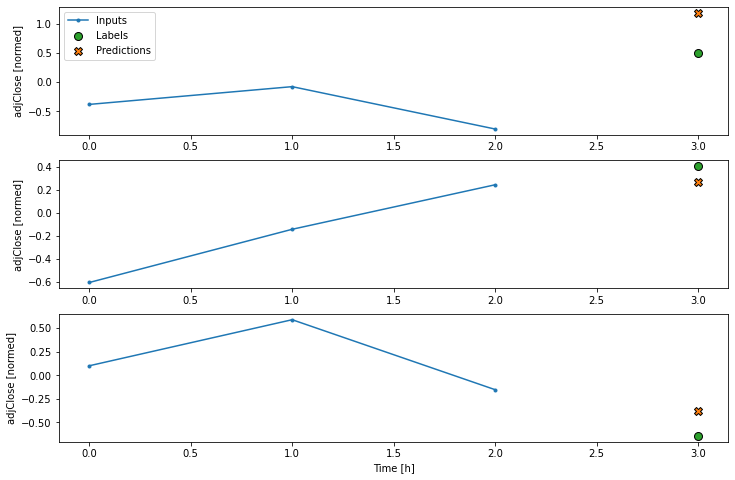

In [306]:
wide_conv_window.plot(conv_model)

In [311]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.2),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
    # Adding a second LSTM layer and some Dropout regularisation
])

In [312]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 1)


In [329]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

8/8 [==============================] - 0s 22ms/step - loss: 0.5800 - mean_absolute_error: 0.5620


2021-09-07 15:53:27.414079: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at strided_slice_op.cc:108 : Invalid argument: Index out of range using input dim 2; input has only 2 dims


InvalidArgumentError: Index out of range using input dim 2; input has only 2 dims [Op:StridedSlice] name: strided_slice/

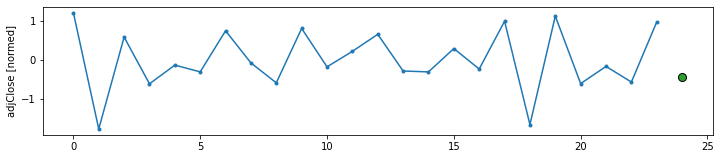

In [314]:
wide_window.plot(lstm_model)

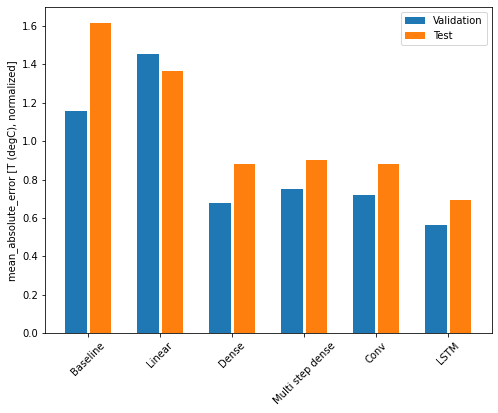

In [330]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [320]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.5967
Linear      : 1.7561
Dense       : 2.6686
Multi step dense: 1.8286
Conv        : 1.9020
LSTM        : 10.5458
